In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../..'))
	print(os.getcwd())
except:
	pass


# Explore the Central Limit Theorem.

### Inspired by: https://news.ycombinator.com/item?id=21909445
### Date: 20191230

In [30]:
import random
import pandas as pd
import numpy as np
from collections import OrderedDict, Counter


# Exploration 1: dice-roll.
### Problem statement: https://news.ycombinator.com/item?id=21912100
> He's the example I have my students do in class. Roll a die repeatedly and tally the results. You'll get a (roughly) uniform distribution of 1s, 2s, 3s, 4s, 5s, and 6s.
> Now to illustrate the CLT, you roll a die 50 times, and average the result. AND your 300 classmates do the same. If you tally the 301 averages, the distribution of the averages will not be uniform but bell-shaped, with average (approximately) 3.5.
> The CLT says (roughly) the distribution of the averages will be approximately normal, regardless of the original distribution.

In [31]:
# init student data structures & roll die - we can trivially keep all the rolls in RAM, so just store arrays.
students = OrderedDict( {} )  # use an OD so we can recover the order of insertion from a DataFrame downstream, if we want to...
for i in range(0,300):      # 300 students
    students[i] = []

    for r in range(0,50):   # 50 rolls per student
        students[i].append( random.randint(1,6) )  # randint is inclusive on both ends; a <= x <= b
assert len( students.keys() ) == 300    # check student count
assert len( students[0] ) == 50         # spot-check student 0
print( str( students[0] ) )             # visually inspect student 0 rolls



[1, 6, 4, 2, 5, 6, 6, 4, 5, 1, 1, 2, 6, 3, 5, 4, 2, 4, 3, 1, 6, 3, 2, 2, 4, 3, 1, 5, 3, 2, 5, 4, 4, 6, 4, 2, 1, 6, 2, 3, 6, 6, 5, 2, 2, 5, 1, 1, 2, 5]


 # Analysis

In [32]:
df = pd.DataFrame( dict.fromkeys( list(range(1,7)), [] ) )
for k in students.keys():
    df = df.append( Counter( students[k] ) , ignore_index=True )
print( df.shape )
df.describe()


(300, 6)


,1,2,3,4,5,6
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,8.366667,8.490000,8.216667,8.453333,8.390000,8.083333
std,2.465594,2.620328,2.616462,2.872046,2.561204,2.630485
min,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000
25%,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,18.000000,20.000000,17.000000,19.000000,16.000000,17.000000


[2.9, 2.9, 2.92, 2.94, 2.96, 2.98, 3.0, 3.02, 3.04, 3.04, 3.06, 3.06, 3.06, 3.06, 3.1, 3.1, 3.1, 3.12, 3.12, 3.14, 3.14, 3.16, 3.16, 3.16, 3.18, 3.18, 3.18, 3.2, 3.2, 3.2, 3.2, 3.22, 3.22, 3.22, 3.22, 3.24, 3.24, 3.24, 3.24, 3.24, 3.26, 3.26, 3.26, 3.26, 3.26, 3.26, 3.26, 3.26, 3.26, 3.26, 3.26, 3.26, 3.26, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.34, 3.34, 3.34, 3.34, 3.34, 3.34, 3.34, 3.34, 3.34, 3.34, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36, 3.38, 3.38, 3.38, 3.38, 3.38, 3.38, 3.38, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.54, 3.54, 3.54

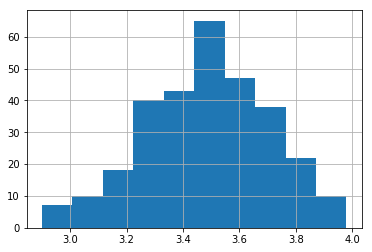

In [33]:
# Okay, as expected we see a roughly uniform distribution of 1s through 6s.
#
# Now suppose we take the mean of the *roll values* for each student (mean of each student's roll list),
# then look at the distribution of averages?
avg_per_student = sorted([ np.mean( students[k] ) for k in students.keys() ])
print( avg_per_student )
pd.Series( avg_per_student ).hist()


# Explanation:
## Wow! The distribution of averages really looks ~Gaussian ("normal").

### But... is it actually Gaussian? A Kolmogorov-Smirnov test or (especially) Shapiro-Wilk test can give some confidence:

In [34]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html
from scipy import stats

alpha = 0.01

# Let's run 2 tests of normality: Kolmogorov-Smirnov, and Shapiro-Wilk (found to have greater power than K-S, via Monte Carlo simulation: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test ).
ks_rslt = stats.kstest( avg_per_student , 'norm' )
sw_rslt = stats.shapiro( avg_per_student )

print("Kolmogorov-Smirnov returns: statistic={} at p-value={} ==> {}reject the H0 that the data are drawn from a Gaussian.".format( str( ks_rslt.statistic ) , str( ks_rslt.pvalue ) , "" if ks_rslt.pvalue < alpha else "fail to " ))
print("Shapiro-Wilk returns: statistic={} at p-value={} ==> {}reject the H0 that the data are drawn from a Gaussian.".format( str( sw_rslt[0] ) , str( sw_rslt[1] ) , "" if sw_rslt[1] < alpha else "fail to " ))


Kolmogorov-Smirnov returns: statistic=0.998134186699616 at p-value=0.0 ==> reject the H0 that the data are drawn from a Gaussian.
Shapiro-Wilk returns: statistic=0.9914851784706116 at p-value=0.08105578273534775 ==> fail to reject the H0 that the data are drawn from a Gaussian.


### For Shapiro-Wilk: given p < 0.01, we can safely say the dice-roll result exhibits a Gaussian shape.

### This result allows us to use parametric statistical methods on our dice-roll dataset. (via: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

### But, the K-S test has p=0 -- which, given that p-values are almost never exactly 0, suggests something is wrong.
### It turns out there's a problem with using K-S (at least NumPy's implementation): it requires a continuous density function (CDF): https://stackoverflow.com/a/46679086

### Let's try again, per the SO post.

In [35]:
n = stats.norm( stats.norm.fit( avg_per_student ) )
n
# #%%
# import matplotlib.pyplot as plt

# plt.hist( avg_per_student , bins=np.arange( min( avg_per_student ) , max( avg_per_student ) + 0.1 , 0.1 ), rwidth=0.5 )
# plt.show()
# #%%
# x = np.arange( min(avg_per_student) , max(avg_per_student) + 0.1 , 0.1 )
# print( x )
# n.pdf( x )
# # plt.plot( x , n.pdf(x) )
# # plt.show()

# I can't get n.pdf() working: I keep getting "ValueError: operands could not be broadcast together with shapes (15,) (2,)", and it's not clear what pdf() is doing under the hood without digging into the code... moving on.


In [36]:
ks_rslt = stats.kstest( avg_per_student , n.cdf )  # throws "ValueError: operands could not be broadcast together with shapes (300,) (2,)". ==> Dot-product dimensionality error... But what to do differently?
print("Kolmogorov-Smirnov returns: statistic={} at p-value={} ==> {}reject the H0 that the data are drawn from a Gaussian.".format( str( ks_rslt.statistic ) , str( ks_rslt.pvalue ) , "" if ks_rslt.pvalue < alpha else "fail to " ))



ValueError: operands could not be broadcast together with shapes (300,) (2,) 

 Okay, giving-up on Kolmogorov-Smirnov for now, getting `ValueError: operands could not be broadcast together with shapes (300,) (2,)`...

## Key question: WHY? Why is this distribution Gaussian (at least according to Shapiro-Wilk)?

 Via classical CLT...: https://en.wikipedia.org/wiki/Central_limit_theorem#Classical_CLT

 First, we've drawn 50 roll values from each of 300 students. 1 student's list of rolls = 1 sample ==> 300 samples.

 Each sample is a sequence of independent and identically distributed (i.i.d.) values drawn from a distribution whose mean = μ = (1+2+3+4+5+6)/6 = 3.5, SD = σ = `np.std([1,2,3,4,5,6])` = 1.7078 (hence variance = σ^2 = 2.9166).

 Then, secondly, according to the law of large numbers (LLN) -- which states that as the # of {samples,trials,events} increases, the more probably a next {sample,trial,event} will occur near the mean of those {samples,trials,events} -- we
 can expect that sample averages will converge to the mean as we increase n, the size of the sample set.

# Key takeaways then w.r.t. machine learning...

 1. **The goal of any ML task is to find a function that best fits a set of data.** Very preferably it does so on out-of-sample data.
 2. **The more data we collect, the more probably we will encounter rare values.** ("Law of Truly Large Numbers") This increases the likelihood that we're modeling a representative set of data.
 3. **The more data we collect, the more accurate that mean values of any feature will be representative of that feature.**